/home/kali/tensorflow_env/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9438 - loss: 0.1658 - val_accuracy: 0.9636 - val_loss: 0.1059
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9646 - loss: 0.1031 - val_accuracy: 0.9681 - val_loss: 0.0920
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9681 - loss: 0.0907 - val_accuracy: 0.9704 - val_loss: 0.0864
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9704 - loss: 0.0863 - val_accuracy: 0.9715 - val_loss: 0.0836
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9702 - loss: 0.0854 - val_accuracy: 0.9713 - val_loss: 0.0838
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9721 - loss: 0.0806 - val_accuracy: 0.9722 - val_loss: 0.0825
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9715 - loss: 0.0836 - val_accuracy: 0.9714 - val_loss: 0.0831
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9710 - loss: 0

FileNotFoundError: [Errno 2] No such file or directory: '/home/kali/tensorflow_env/Diabetes2323/Diabetes2/Diabetes/static/model_accuracy.png'

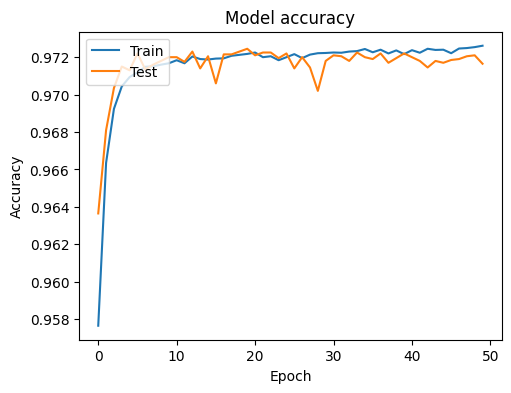

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
#import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Encode categorical variables
gender_encoder = LabelEncoder()
smoking_history_encoder = LabelEncoder()

data['gender'] = gender_encoder.fit_transform(data['gender'])
data['smoking_history'] = smoking_history_encoder.fit_transform(data['smoking_history'])

# Split the data into features and target
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save('diabetes_model.h5')

# Save the scaler and encoders
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('gender_encoder.pkl', 'wb') as f:
    pickle.dump(gender_encoder, f)
with open('smoking_history_encoder.pkl', 'wb') as f:
    pickle.dump(smoking_history_encoder, f)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('static/model_accuracy.png')
plt.clf()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('static/model_loss.png')
plt.clf()


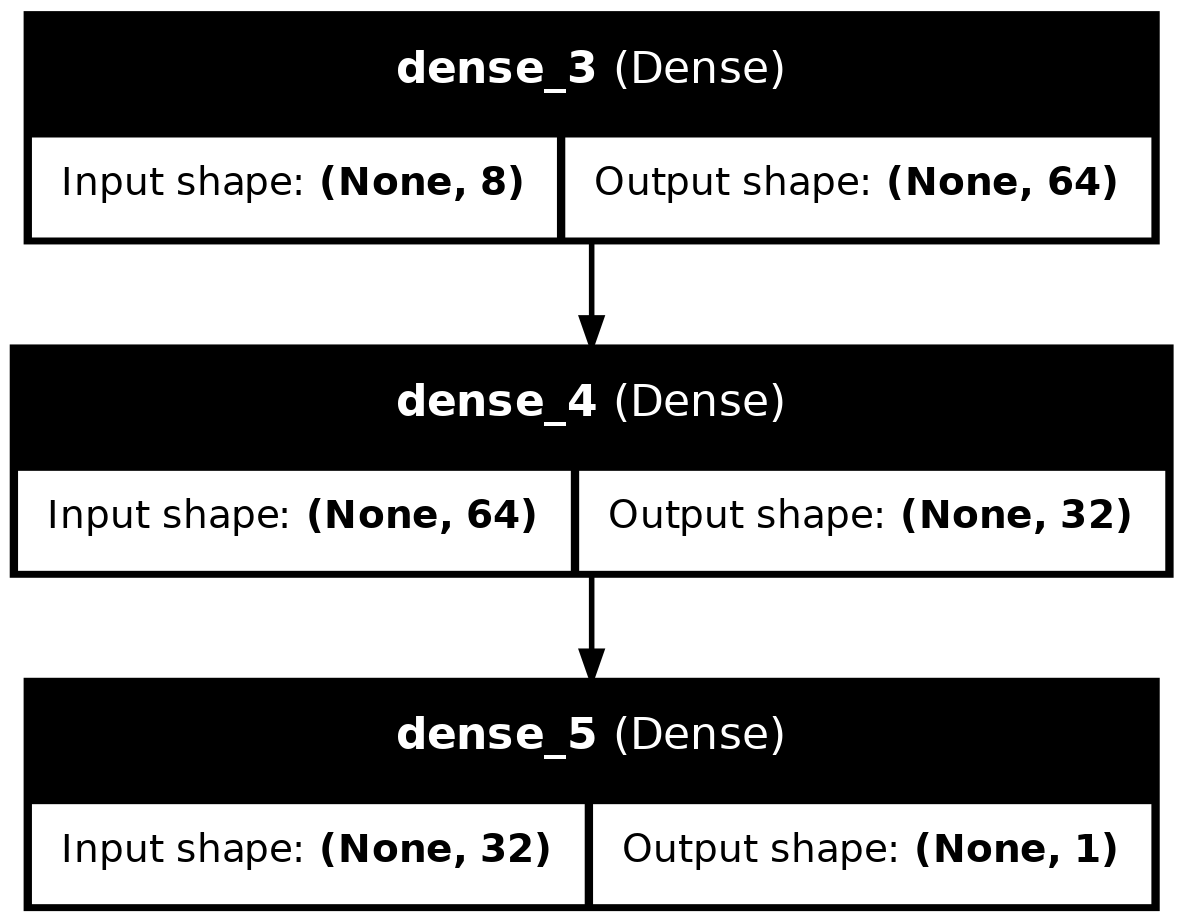

<Figure size 1200x400 with 0 Axes>

In [3]:


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('model_accuracy.png')
plt.clf()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('model_loss.png')
plt.clf()



from tensorflow.keras.utils import plot_model

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Plot and save the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [3]:
%pip install pydot

DEPRECATION: Loading egg at /home/kali/tensorflow_env/venv/lib/python3.11/site-packages/Rune-0.3.2.dev0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/kali/tensorflow_env/venv/lib/python3.11/site-packages/Flask_User-1.0.2.3-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
smoking_history_encoder = LabelEncoder()

data['gender'] = gender_encoder.fit_transform(data['gender'])
data['smoking_history'] = smoking_history_encoder.fit_transform(data['smoking_history'])

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Basic info
print(data.info())


   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
              gender            age  hypertension  heart_disease  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean        0.414660      41.885856       0.07485       0.039420   
std         0.493031      22.516840       0.26315       0.194593   
min    

In [ ]:
# 2. Data Analysis and Pattern Discovery

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['gender'])
plt.title('Gender Distribution')
plt.show()

# Class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['diabetes'])
plt.title('Diabetes Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# 3. More Detailed Data Analysis

# Distribution of Hypertension
plt.figure(figsize=(10, 6))
sns.countplot(data['hypertension'])
plt.title('Hypertension Distribution')
plt.show()

# Distribution of Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(data['heart_disease'])
plt.title('Heart Disease Distribution')
plt.show()

# Distribution of Smoking History
plt.figure(figsize=(10, 6))
sns.countplot(data['smoking_history'])
plt.title('Smoking History Distribution')
plt.show()

# Heatmap of correlations focusing on key features
plt.figure(figsize=(12, 10))
sns.heatmap(data[['age', 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Features')
plt.show()


In [ ]:
# 4. Bivariate Analysis

# Age vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='age', data=data)
plt.title('Age vs Diabetes')
plt.show()

# Gender vs Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='diabetes', data=data)
plt.title('Gender vs Diabetes')
plt.show()

# Smoking History vs Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='diabetes', data=data)
plt.title('Smoking History vs Diabetes')
plt.show()

# Scatter plot of Age vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=data)
plt.title('Age vs BMI')
plt.show()


In [ ]:
# 5. Multiple Plots

# Pairplot to see relationships between features
sns.pairplot(data[['age', 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes')
plt.show()

# Violin plot of Age vs Diabetes
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='age', data=data)
plt.title('Age vs Diabetes')
plt.show()

# Swarm plot of BMI vs Diabetes
plt.figure(figsize=(10, 6))
sns.swarmplot(x='diabetes', y='bmi', data=data)
plt.title('BMI vs Diabetes')
plt.show()


In [ ]:
# 6. Time Series Analysis (if applicable)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming there's a Date column in the dataset
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Plotting the data over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='bmi', hue='diabetes', data=data)
    plt.title('BMI over Time')
    plt.show()
    
    # Plotting the data over time by Gender
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='bmi', hue='gender', data=data)
    plt.title('BMI over Time by Gender')
    plt.show()


In [ ]:
# 7. 3D Plots

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 3D scatter plot of Age, BMI, and HbA1c_level
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['age'], data['bmi'], data['HbA1c_level'], c=data['diabetes'], cmap='coolwarm', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('HbA1c_level')
plt.title('3D Scatter Plot of Age, BMI, and HbA1c_level')
plt.show()
